In [0]:
pip install scipy==1.0.0

     |████████████████████████████████| 50.0MB 91kB/s 
ERROR: umap-learn 0.4.3 has requirement scipy>=1.3.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.0.0 which is incompatible.
ERROR: seaborn 0.10.1 has requirement scipy>=1.0.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.0.31 has requirement scipy>=1.1.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
pip install tensorflow==1.15.2

     |████████████████████████████████| 110.5MB 35kB/s 
     |████████████████████████████████| 3.8MB 57.8MB/s 
     |████████████████████████████████| 512kB 60.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1afe645155ffa24a3564893813f3cbd52dcb5dd05086d48492a7f3f0b938a06f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [0]:
import tensorflow
import scipy
print(tensorflow.__version__)
print(scipy.__version__)

1.15.2
1.0.0


In [0]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir ./datasets
# Copy files from Google Drive to the VM local filesystem
!cp -r "/content/drive/My Drive/Colab Notebooks/ARF/datasets/DIV2K" ./datasets/DIV2K
!ls datasets/DIV2K/

0001.png  0114.png  0227.png  0340.png	0453.png  0566.png  0679.png  0792.png
0002.png  0115.png  0228.png  0341.png	0454.png  0567.png  0680.png  0793.png
0003.png  0116.png  0229.png  0342.png	0455.png  0568.png  0681.png  0794.png
0004.png  0117.png  0230.png  0343.png	0456.png  0569.png  0682.png  0795.png
0005.png  0118.png  0231.png  0344.png	0457.png  0570.png  0683.png  0796.png
0006.png  0119.png  0232.png  0345.png	0458.png  0571.png  0684.png  0797.png
0007.png  0120.png  0233.png  0346.png	0459.png  0572.png  0685.png  0798.png
0008.png  0121.png  0234.png  0347.png	0460.png  0573.png  0686.png  0799.png
0009.png  0122.png  0235.png  0348.png	0461.png  0574.png  0687.png  0800.png
0010.png  0123.png  0236.png  0349.png	0462.png  0575.png  0688.png  0801.png
0011.png  0124.png  0237.png  0350.png	0463.png  0576.png  0689.png  0802.png
0012.png  0125.png  0238.png  0351.png	0464.png  0577.png  0690.png  0803.png
0013.png  0126.png  0239.png  0352.png	0465.png  0578.png  0691.

In [0]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def carga_imagenes(n_imagenes=1, dataset_name="", img_res=(128,128), reduccion=1):

  ## CARGAMOS LAS IMÁGENES E INICIALIZAMOS LAS VARIABLES ##
  ruta = glob('./datasets/%s/*' % (dataset_name))
  conjunto_imagenes = np.random.choice(ruta, size=n_imagenes)

  # Definimos las matrices que guardan las imágenes en baja y alta calidad
  imgs_hr = []
  imgs_lr = []
  # Obtenemos la resolución de las imágenes
  img = scipy.misc.imread(ruta[1], mode='RGB')
  size = img.shape
  print("Tamaño original")
  print(img.shape)

  ## REDUCIMOS LA RESOLUCIÓN DE TODAS LAS IMÁGENES ##
  for i in conjunto_imagenes:
    img = scipy.misc.imread(i)
    img_hr = scipy.misc.imresize(img, img_res)

    nX = img_hr.shape[0]/reduccion
    nY = img_hr.shape[1]/reduccion

    img_lr = scipy.misc.imresize(img, (int(nX), int(nY)))
    img_lr= cv2.resize(img_lr,img_res, interpolation = cv2.INTER_NEAREST )

    imgs_hr.append(img_hr)
    imgs_lr.append(img_lr)
  
  imgs_hr = np.array(imgs_hr)
  imgs_lr = np.array(imgs_lr)

  size_lr = [imgs_lr.shape[1], imgs_lr.shape[2], 3]
  size_hr = [imgs_hr.shape[1], imgs_hr.shape[2], 3]
        
  return imgs_hr[:,:,:,:], imgs_lr[:,:,:,:] , size_lr , size_hr

In [0]:
import numpy                                                     
import math                                                      
import cv2                                                       
import matplotlib.pyplot as plt            

def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Tamaño original
(260, 260, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        49216     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        131104    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 3)         387       
Total params: 180,707
Trainable params: 180,707
Non-trainable params: 0
_________________________________________________________________

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 8s 103ms/step - loss: 0.3303 - val_loss: 0.1906
Epoch 2/200
80/80 [==============================] - 8s 101ms/step - loss: 0.1517 - val_loss: 0.1290
Epoch 3/200
80/80 [==============================]

Text(50, 5, 'SSIM    :   0.8118340843095458')

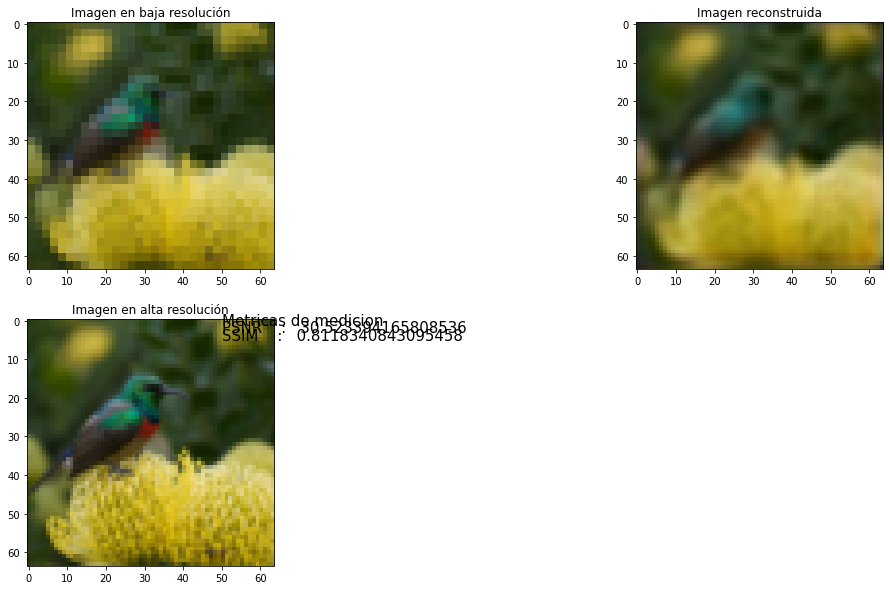

In [0]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def construir_red(tam=(7,7,1)):
    srcnn = Sequential()
    # Hacemos el procesamiento con una ventana grande de 64 filtros
    srcnn.add(Conv2D(filters = 64, kernel_size = (16, 16), padding = 'Same', 
                     activation = 'relu', input_shape = tam))
    
    srcnn.add(Conv2D(filters = 32, kernel_size = (8,8), padding = 'Same',
                     activation = 'relu'))
    
    srcnn.add(Conv2D(filters = 3, kernel_size = (2,2),padding = 'Same',   
                     activation ='relu'))
    
    opt = optimizers.Adam(lr=0.001)
    srcnn.compile(optimizer=opt, loss='mean_squared_error')
    srcnn.summary()

    return srcnn

escala = 2
nimagenes = 100
tam = (64,64)
paso = 20
imgs_hr, imgs_lr, tam_lr, tam_hr = carga_imagenes(nimagenes, "DIV2K", (64, 64), escala)
div_en = 80 #Porcentaje para dividir las imágenes en train y validation

## EXTRAEMOS LAS CARACTERISTICAS DE LAS IMAGENES SEGUN SU TAMAÑO 
## PARA CREAR LOS DATOS DE TRAIN Y VALIDATION

x_train = []
y_train = []
x_val = []
y_val = []

# Añadimos a una matriz las imágenes de entrenamiento 

for i in range(0, int(nimagenes*div_en/100)):
  vx = imgs_hr[i,:,:,:]/255
  vy = imgs_lr[i,:,:,:]/255
  h = vy.shape[0]
  w = vy.shape[1]

  for x in range(0, h-tam[0]+1, paso):
    for y in range(0, w-tam[1]+1, paso):
      tx = vx[x:x+tam[0], y:y+tam[1], :].reshape(tam[0], tam[1], 3)
      ty = vy[x:x+tam[0], y:y+tam[1], :].reshape(tam[0], tam[1], 3)
      x_train.append(tx)
      y_train.append(ty)

# Añadimos a una matriz las imágenes de validación

for i in range(int(nimagenes*div_en/100), nimagenes):
  vy = imgs_hr[i,:,:,:]/255
  vx = imgs_lr[i,:,:,:]/255
  h = vy.shape[0]
  w = vy.shape[1]

  for x in range(0, h-tam[0]+1, paso):
    for y in range(0, w-tam[1]+1, paso):
      tx = vx[x:x+tam[0], y:y+tam[1], :].reshape(tam[0], tam[1], 3)
      ty = vy[x:x+tam[0], y:y+tam[1], :].reshape(tam[0], tam[1], 3)
      x_val.append(tx)
      y_val.append(ty)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

# Construimos la SRCNN, cuyo valor de entrada es el tamaño de la imagen
srcnn = construir_red(tx.shape)

# Entrenamos la red
srcnn.fit(x_train, y_train, batch_size=20, epochs=200, validation_data=(x_val, y_val))
srcnn.save('srgan.h5')

# Imagen generada por la red

prueba = x_train[0,:,:,:]
prueba = prueba.reshape(1, tam[0], tam[1], 3)
generada = srcnn.predict(prueba)

# Adecuamos la imagen para ser visualizada

generada = generada.reshape(tam[0], tam[1], 3)
generada = (generada*255)
generada = generada.astype(np.uint8)

# Métricas de evaluación

original = imgs_hr[0,:,:]
PSNR = psnr(original, generada)
SSIM = ssim(original, generada, multichannel=True)

print("Métricas")
print(PSNR)
print(SSIM)

## VISUALIZAMOS EL RESULTADO ##

plt.figure(figsize=(20,10))

plt.subplot(221)
plt.title('Imagen en baja resolución') 
plt.imshow(imgs_lr[0,:,:,:], cmap='gray') 
plt.savefig("LR")

plt.subplot(222)
plt.title('Imagen reconstruida')
plt.imshow(generada,cmap='gray')

plt.subplot(223)
plt.title('Imagen en alta resolución') 
plt.imshow(imgs_hr[0,:,:,:], cmap='gray') 

t = ("Metricas de medicion")
t1 = ("PSNR    :   "+str(PSNR))
t2 = ("SSIM    :   "+str(SSIM))
plt.text(50, 1, t, ha='left', rotation=0,fontsize=15, wrap=True)
plt.text(50, 3, t1, ha='left', rotation=0,fontsize=15, wrap=True)
plt.text(50, 5, t2, ha='left', rotation=0,fontsize=15, wrap=True)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Tamaño original
(260, 260, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64, 64, 256)       1024      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1048576)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               536871424 
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)             

/usr/local/lib/python3.6/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


Text(100, 10, 'SSIM    :   0.7875289117786927')

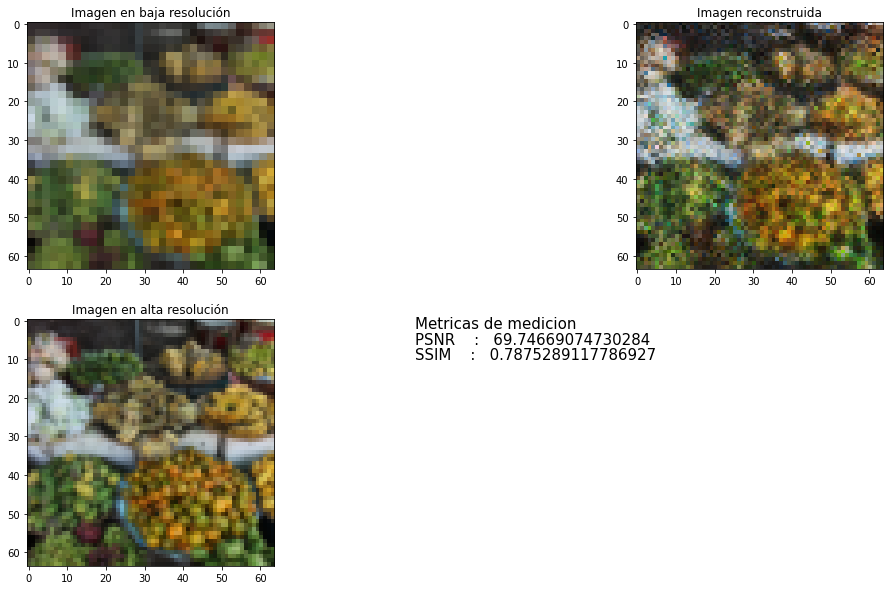

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers import Conv2D, Input,MaxPool2D, Reshape,Activation,Flatten, Dense, Dropout
from keras.optimizers import adam
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
import keras.backend as K
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model,Sequential
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
import tensorflow as tf
from keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Dense
from skimage.metrics import structural_similarity as ssim

def construir_vgg(size=(7,7,1)):
    path_model = '/content/drive/My Drive/Colab Notebooks/ARF/srgan.h5'

    input_shape = size

    vgg = load_model(path_model)
    vgg.summary()
    vgg.outputs = [vgg.layers[2].output]

    input_layer = Input(shape=input_shape)
    features = vgg(input_layer)

    model = Model(inputs=[input_layer], outputs=[features])
    return model

def crear_generador(size=(7,7,1),escala=1):
    generator=Sequential()

    generator.add(Dense(units=256,input_shape = size))
    generator.add(Flatten())
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
     
    generator.add(Dense(units=12288, activation='sigmoid'))
    generator.add(Reshape((64,64,3)))
    generator.summary()
    
    return generator

def crear_discriminador(size=(7,7,1)):
  discriminator=Sequential()
  discriminator.add(Dense(units=1024, input_shape = size))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
    
  discriminator.add(Dense(units=512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
    
  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))
  
  discriminator.add(Dense(units=3, activation='sigmoid'))
  discriminator.summary()

  return discriminator

epocas = 300
nimagenes = 100
loteimagenes = 10
optimizador = adam(lr=0.0002, beta_1=0.5)
escala = 2

# Cargamos las imágenes de los datasets en alta y baja resolución
imgs_hr, imgs_lr, size_lr, size_hr = carga_imagenes(nimagenes,"DIV2K", (64,64), escala) 
imgs_hr = imgs_hr/255
imgs_lr = imgs_lr/255

# Creamos el generador y el discriminador
generador = crear_generador(size_lr, escala)
discriminador = crear_discriminador(size_hr)

## CREAMOS LA VGG ##
vgg = construir_vgg(size_hr)
vgg.trainable = False
vgg.compile(loss='mse', optimizer=optimizador, metrics=['accuracy'])
discriminador.compile(loss="binary_crossentropy", optimizer=optimizador)

## CREAMOS LA GAN ##

# Entrada de la GAN
input_high_resolution = Input(shape=size_hr)
input_low_resolution = Input(shape=size_lr)

# Generar versión en alta resolución
generated = generador(input_low_resolution)

# Extraemos características
features = vgg(generated)

discriminador.trainable = False

# Generamos la probabilidad de que la imagen sea falsa o real
probs = discriminador(generated)

# Compilamos la red
adversarial_model = Model([input_low_resolution, input_high_resolution], [probs, features])
adversarial_model.compile(loss=['binary_crossentropy', 'mse'], loss_weights=[1e-3, 1], optimizer=optimizador)

## ENTRENAMOS LA GAN ##

for e in range(1, epocas+1):
  print('-'*15, 'Epoch %d' % e, '-'*15)
  for _ in range(loteimagenes):
    # Obtenemos 10 imágenes aleatorias de la cantidad de imágenes cargadas
    rand_nums = np.random.randint(0, imgs_hr.shape[0], size=loteimagenes)
    lote_hr = imgs_hr[rand_nums]
    lote_lr = imgs_lr[rand_nums]
    # Predicción del lote de baja resolución
    generated_images_sr = generador.predict(lote_lr)
    # Matrices con valores cercanos a 1 para la validez, y con 0 para los que no son válidos
    real_data_Y = np.ones((loteimagenes, 64, 64, 3))
    fake_data_Y = np.zeros((loteimagenes, 64, 64, 3))
    # Etapa de entrenamiento del discriminador
    discriminador.trainable = True
    # Adecuamos la entrada para el discriminador
    d_loss_real = discriminador.train_on_batch(lote_hr, real_data_Y)
    d_loss_fake = discriminador.train_on_batch(generated_images_sr, fake_data_Y)
    d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)
    # Nuevas imágenes para entrenar la red
    rand_nums = np.random.randint(0, imgs_hr.shape[0], size=loteimagenes)
    lote_hr = imgs_hr[rand_nums]
    lote_lr = imgs_lr[rand_nums]
    # Vector con ganancias de la red cercanas a 1
    gan_Y = np.ones((loteimagenes, 64, 64, 3))
    # Dejamos de entrenar el discriminador
    discriminador.trainable = False
    # Características de las imágenes
    features = vgg.predict(lote_hr)
    #Entrenamiento de la GAN
    g_loss = adversarial_model.train_on_batch([lote_lr, lote_hr],
                                             [gan_Y, features])
    print(g_loss)
print("fin del ciclo")

## VISUALIZAMOS EL RESULTADO ##

plt.figure(figsize=(20,10)) 

plt.subplot(221)
plt.title('Imagen en baja resolución')
plt.imshow(imgs_lr[0,:,:,:], cmap='gray') 

plt.subplot(222)
plt.title('Imagen reconstruida')
seg = imgs_lr[0,:,:,:]
seg = seg.reshape(1,imgs_lr.shape[1],imgs_lr.shape[2],3)
reconstruida = generador.predict(seg)
reconstruida = reconstruida.reshape(size_hr[0], size_hr[1], 3)
plt.imshow(reconstruida, cmap='gray') 

plt.subplot(223)
plt.title('Imagen en alta resolución')  # Ponemos un título
plt.imshow(imgs_hr[0,:,:,:],cmap='gray')

original = imgs_hr[0,:,:,:]
PSNR = psnr(original,reconstruida)
SSIM = ssim(original, reconstruida, multichannel=True)
t = ("Metricas de medicion")
t1 = ("PSNR    :   "+str(PSNR))
t2 = ("SSIM    :   "+str(SSIM))
plt.text(100, 2, t, ha='left', rotation=0,fontsize=15, wrap=True)
plt.text(100, 6, t1, ha='left', rotation=0,fontsize=15, wrap=True)
plt.text(100, 10, t2, ha='left', rotation=0,fontsize=15, wrap=True)
